In [275]:
import pandas as pd
import numpy as np

In [276]:
import glob

In [277]:
glob.glob("*.txt")

['BLACK VOLTA, VONKORO.txt',
 'BOUGOURIBA, DAN.txt',
 'dayfile.txt',
 'discharge_combined_adjusted.txt',
 'MOU HOUN, BLACK VOLTA, SAMANDENI.txt',
 'MOU HOUN, BLACK VOLTA,DAPOLA.txt',
 'NAKANBE, WHITE VOLTA, YAKALA.txt',
 'NAKANBE, WHITE VOLTA, YILOU.txt',
 'NAZINON, RED VOLTA, DAKAYE.txt',
 'PENDJARI, PORGA.txt',
 'SINGOU, SAMBOALI.txt',
 'volt_day.txt']

In [313]:
links = ["https://goo.gl/maps/B6rpdv8nrVrWcMGY9","https://goo.gl/maps/k2Hn8jJ3aM2FLVfMA"]

In [353]:
locations = ['BLACK VOLTA, VONKORO.txt',
 'BOUGOURIBA, DAN.txt',
 'MOU HOUN, BLACK VOLTA, SAMANDENI.txt',
 'MOU HOUN, BLACK VOLTA,DAPOLA.txt',
 'NAKANBE, WHITE VOLTA, YAKALA.txt',
 'NAKANBE, WHITE VOLTA, YILOU.txt',
 'NAZINON, RED VOLTA, DAKAYE.txt',
 'PENDJARI, PORGA.txt',
 'SINGOU, SAMBOALI.txt']
df_per_location_lst = []

In [362]:
# i = 1
for i in [0,1,2,3,4,5,6,7]:
    df = pd.read_csv(locations[i], delimiter=",")
    df['n_month_row'] = df.apply(lambda x: str(x.date).strip()[0],axis=1)
    df['year'] = df.apply(lambda x: str(x.date).strip()[1:].strip()[-4:],axis=1)
    df['month'] = df.apply(lambda x: str(x.date).strip()[1:].strip()[:-4],axis=1)
    df.index.name = locations[i][:-4]
    df = df.drop(columns="date")

    df_lst = []
    for month_index in np.arange(0, len(df),3):

        month = df[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']].iloc[month_index:month_index+3]\
                                                                         .astype(float).to_numpy()
        new_month_data = month.flatten()[~np.in1d(month.flatten(), np.array(9999))] 
        dates = []
        for day in range(1,len(new_month_data)+1):
            date_string = f'{df.iloc[month_index].year}-{df.iloc[month_index].month}-{day}'
            dates.append(pd.Timestamp(date_string))
        new_month = pd.DataFrame(index=dates, data=new_month_data, columns=["Q"])
        df_lst.append(new_month)

    df_per_location_lst.append(pd.concat(df_lst))

ValueError: could not convert string to float: '            2 81952'

In [346]:
# df_per_location_lst[1]

<AxesSubplot:>

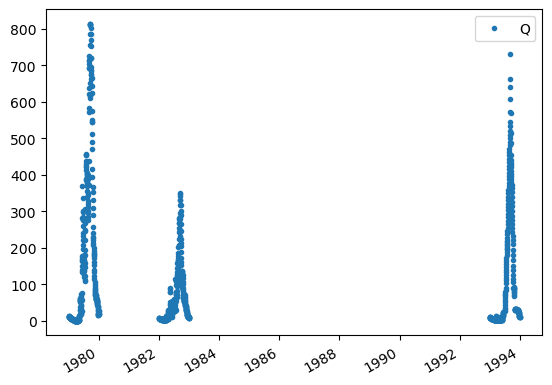

In [347]:
df_per_location_lst[2].plot(marker='.',lw=0)                                                        